In [1]:
#Eureka_Interfaces
#Calculates the fraction retracked of waveforms, as well as comparing different snow properties to the errors in estimating snow depths
#also shows the distributions of estimated snow depths compared to in situ snowdepths in the second half
#Claude de Rijke-Thomas
#16th May 2022

In [2]:
icetype = 'fyi' #the ice type that we want to be investigating (can either be fyi or myi)
saving = False
from LPS_functions import *

In [3]:
#initialising empty arrays:
lat = np.array([], dtype='double')
lon = np.array([], dtype='double')
b_as = np.array([],dtype='int')
b_si = np.array([], dtype='int')
snow_depth_dot_n = np.array([], dtype='double')

insitu_data_filepath = '/Users/claudederijkethomas/Desktop/PhD/PYTHON/OIB/'\
                        +'19-21Apr2016/SR/insitu_data_eureka.csv'

#opening the csv file to read through (to make a loading bar of progress):
line_count=0
with open(insitu_data_filepath, 'r') as csvfile:
    readCSV = csv.DictReader(csvfile)
    #establishing the headers as the first line of the file:
    headers = readCSV.fieldnames
    for line in readCSV:
        line_count+=1        
#Timestamp,Counter,DepthCm,Latitude,Longitude,Site,IceType are the headers
Timestamp = np.array([], dtype='str')
Counter = np.array([], dtype='int')
DepthCm = np.array([], dtype='double')
Latitude = np.array([], dtype='double')
Longitude = np.array([], dtype='double')
Site = np.array([], dtype='str')
IceType = np.array([], dtype='str')

with open(insitu_data_filepath, 'r') as csvfile:
    readCSV = csv.DictReader(csvfile)
    #establishing the headers as the first line of the file:
    headers = readCSV.fieldnames
    count=-1
    for line in readCSV:
        count+=1
        if count%1000==0:
            sys.stdout.write("\r"+str(100*count/line_count)+"% of the way ")
        if str(line['Timestamp'][0:2]).isdigit():
            if int(line['Timestamp'][0:2])>=15: # if data is taken on the 15th or later
                if str(line['IceType'])==icetype:
                    Timestamp = np.append(Timestamp, str(line['Timestamp']))
                    Counter = np.append(Counter, int(line['Counter']))
                    DepthCm = np.append(DepthCm, float(line['DepthCm']))
                    Latitude = np.append(Latitude, float(line['Latitude']))
                    Longitude = np.append(Longitude, float(line['Longitude']))
                    Site = np.append(Site, str(line['Site']))
                    IceType = np.append(IceType, str(line['IceType']))

    sys.stdout.write("\r"+"100% complete                 ")

100% complete                  

In [4]:
insitu_xs, insitu_ys = easeProj(Longitude,Latitude)
insitu_kdtree = spatial.cKDTree(np.column_stack((insitu_xs, insitu_ys)))

(-86.80707844444069, -86.7742760856042, 79.96737370028626, 79.97777059649245)


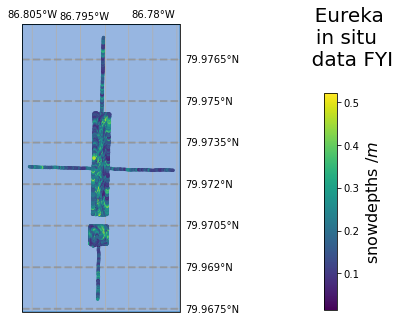

In [5]:
fig = plt.figure()

central_lon,central_lat = np.mean(Longitude),np.mean(Latitude)
ax = fig.add_axes([0,0,0.77,1], projection=ccrs.Orthographic(central_lon,central_lat))
scat = ax.scatter(Longitude,Latitude,s=5,c=DepthCm,transform=ccrs.PlateCarree(), zorder=3)
ax.gridlines()
cbar_ax = fig.add_axes([0.90, 0.007, 0.03, 0.753]) #start xpos, start ypos, #xwidth, ylendth
cbar_ax.set_title("       Eureka \n     in situ\n       data "+str(icetype).upper()+"\n",fontsize=20)
lol = cbar_ax.scatter(x=np.zeros(len(DepthCm)),y=np.zeros(len(DepthCm)),c=DepthCm/100)
cb = fig.colorbar(lol, cax=cbar_ax)
cb.set_label('snowdepths $/m$', size=16)

ax.coastlines(resolution='50m')
ocean110 = cartopy.feature.NaturalEarthFeature('physical', 'ocean', \
    scale='50m', edgecolor='none', facecolor=cartopy.feature.COLORS['water'])
ax.add_feature(ocean110)

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.bottom_labels = False
gl.top_labels = True
gl.left_labels = False
gl.xlines = False

xlims = ax.get_xlim()
ylims = ax.get_ylim()

extent_lonlat = ax.get_extent(crs=ccrs.PlateCarree())
print(extent_lonlat)
dataExtentPolygon = Polygon([(extent_lonlat[0],extent_lonlat[2]),\
                             (extent_lonlat[1],extent_lonlat[2]),\
                             (extent_lonlat[1],extent_lonlat[3]),\
                             (extent_lonlat[0],extent_lonlat[3])])
ax.plot(*dataExtentPolygon.exterior.xy,transform=ccrs.PlateCarree())
# lon_ku, lat_ku, alt_ku, pitch_angle, roll_angle, aircraft_alt_ku, appropriate_indices = KuBandSurface('IRKUB1B_20160419_04_004_deconv.nc', threshold_fraction=0.7)
# ax.scatter(lon_ku,lat_ku,s=10 ,zorder=3, transform = ccrs.PlateCarree())
# lon_ku, lat_ku, alt_ku, pitch_angle, roll_angle, aircraft_alt_ku, appropriate_indices = KuBandSurface('IRKUB1B_20160419_04_032_deconv.nc', threshold_fraction=0.7)
# ax.scatter(lon_ku,lat_ku,s=10 ,zorder=3, transform = ccrs.PlateCarree())
# lon_ku, lat_ku, alt_ku, pitch_angle, roll_angle, aircraft_alt_ku, appropriate_indices = KuBandSurface('IRKUB1B_20160419_04_050_deconv.nc', threshold_fraction=0.7)
# ax.scatter(lon_ku,lat_ku,s=10 ,zorder=3, transform = ccrs.PlateCarree())
# lon_ku, lat_ku, alt_ku, pitch_angle, roll_angle, aircraft_alt_ku, appropriate_indices = KuBandSurface('IRKUB1B_20160419_04_080_deconv.nc', threshold_fraction=0.7)
# ax.scatter(lon_ku,lat_ku,s=10 ,zorder=3, transform = ccrs.PlateCarree())
# lon_ku, lat_ku, alt_ku, pitch_angle, roll_angle, aircraft_alt_ku, appropriate_indices = KuBandSurface('IRKUB1B_20160419_04_180_deconv.nc', threshold_fraction=0.7)
# ax.scatter(lon_ku,lat_ku,s=10 ,zorder=3, transform = ccrs.PlateCarree())
# lon_ku, lat_ku, alt_ku, pitch_angle, roll_angle, aircraft_alt_ku, appropriate_indices = KuBandSurface('IRKUB1B_20160419_04_208_deconv.nc', threshold_fraction=0.7)
# ax.scatter(lon_ku,lat_ku,s=10 ,zorder=3, transform = ccrs.PlateCarree())
# lon_ku, lat_ku, alt_ku, pitch_angle, roll_angle, aircraft_alt_ku, appropriate_indices = KuBandSurface('IRKUB1B_20160419_04_230_deconv.nc', threshold_fraction=0.7)
# ax.scatter(lon_ku,lat_ku,s=10 ,zorder=3, transform = ccrs.PlateCarree())
# lon_ku, lat_ku, alt_ku, pitch_angle, roll_angle, aircraft_alt_ku, appropriate_indices = KuBandSurface('IRKUB1B_20160419_04_258_deconv.nc', threshold_fraction=0.7)
# ax.scatter(lon_ku,lat_ku,s=10 ,zorder=3, transform = ccrs.PlateCarree())
# lon_ku, lat_ku, alt_ku, pitch_angle, roll_angle, aircraft_alt_ku, appropriate_indices = KuBandSurface('IRKUB1B_20160419_04_259_deconv.nc', threshold_fraction=0.7)
# ax.scatter(lon_ku,lat_ku,s=10 ,zorder=3, transform = ccrs.PlateCarree())


# radar_file = "../PYTHON/OIB/19-21Apr2016/SR/Eureka/Data_20160419_04_004.mat"
# radar_dat = SnowRadar(radar_file, l_case='full')
# ax.scatter(radar_dat.lon,radar_dat.lat,c='red',s=10 ,zorder=3, transform = ccrs.PlateCarree())

ax.set_extent(extent_lonlat,crs=ccrs.PlateCarree())
plt.show()

In [6]:
if icetype=='fyi':
    coincident_ku_files = ['IRKUB1B_20160419_04_004_deconv.nc', 'IRKUB1B_20160419_04_032_deconv.nc', 'IRKUB1B_20160419_04_050_deconv.nc', 'IRKUB1B_20160419_04_080_deconv.nc', 'IRKUB1B_20160419_04_180_deconv.nc', 'IRKUB1B_20160419_04_208_deconv.nc', 'IRKUB1B_20160419_04_230_deconv.nc', 'IRKUB1B_20160419_04_258_deconv.nc', 'IRKUB1B_20160419_04_259_deconv.nc']
elif icetype=='myi':
    coincident_ku_files = ['IRKUB1B_20160419_04_035_deconv.nc', 'IRKUB1B_20160419_04_047_deconv.nc', 'IRKUB1B_20160419_04_083_deconv.nc', 'IRKUB1B_20160419_04_176_deconv.nc', 'IRKUB1B_20160419_04_211_deconv.nc', 'IRKUB1B_20160419_04_226_deconv.nc', 'IRKUB1B_20160419_04_262_deconv.nc']

In [7]:
"""Making an overlapping KDTree of all the atm data from all of the flyovers"""
all_overlapping_h5_files = []
for ku_file in coincident_ku_files:
    for coinc in coincidence_arr:
        for sub_arr in coinc:
            if ku_file in sub_arr:
                #finding the kdtree that corresponds to the atm laser data file that coincides with ku_file:
                all_overlapping_h5_files.append(coinc[0])
                ku_files = coinc[1]
                
all_overlapping_h5_files = list(dict.fromkeys(all_overlapping_h5_files))
atm_laser = projectedLaser(all_overlapping_h5_files, "ease")
x_atm_laser,y_atm_laser = atm_laser.east, atm_laser.north

overlapping_kdtree = spatial.cKDTree(np.column_stack((x_atm_laser, y_atm_laser)))

In [8]:
print(list(dict.fromkeys(all_overlapping_h5_files)))

['ILATM1B_20160419_125622.ATM5AT2.h5', 'ILATM1B_20160419_130300.ATM5AT2.h5', 'ILATM1B_20160419_131819.ATM5AT2.h5', 'ILATM1B_20160419_133426.ATM5AT2.h5', 'ILATM1B_20160419_135020.ATM5AT2.h5', 'ILATM1B_20160419_150017.ATM5AT2.h5', 'ILATM1B_20160419_151537.ATM5AT2.h5', 'ILATM1B_20160419_153119.ATM5AT2.h5', 'ILATM1B_20160419_155419.ATM5AT2.h5']


In [9]:
"""using the ATM laser file offsets to align each ATM laser file to each other (each ATM file has an altimetric offset relative to the others
 determined by its mean patch offset, relative to the overall mean patch elevation of the ATM laser files combined).
 These offsets are calculated in Eureka_ATM_laser_Offsets.ipynb"""
if icetype == 'fyi':
    #this is  mean_atm_elev_each_flyover - np.mean(mean_atm_elev_each_flyover)
    atm_elev_flyover_offsets = [-0.00142218, -0.00882589, -0.0182781, -0.01468046, -0.06314833, 0.0375774, 0.02246962, 0.02315396, 0.02315396] #for first year ice!!!!
elif icetype == 'myi':
    atm_elev_flyover_offsets = [-0.01541401, -0.02724434, -0.00367711, -0.05813091, 0.03078281, 0.03742214, 0.03626142]
all_overlapping_atm_alts_arr = np.array([],dtype='double')
for i,ku_file in enumerate(coincident_ku_files):
    h5_files = []
    for coinc in coincidence_arr:
        for sub_arr in coinc:
            if ku_file in sub_arr:
                #finding the kdtree that corresponds to the atm laser data file that coincides with ku_file:
                h5_files.append(coinc[0])
                ku_files = coinc[1]
    atm = projectedLaser(h5_files, "ease")
    all_overlapping_atm_alts_arr = np.append(all_overlapping_atm_alts_arr, atm.alt - atm_elev_flyover_offsets[i])
    
#overriding the atm altitudes to compensate for the offsets between the atm files:
atm_laser.alt = all_overlapping_atm_alts_arr

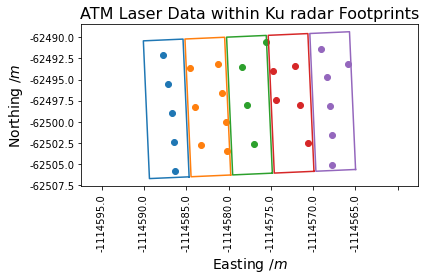

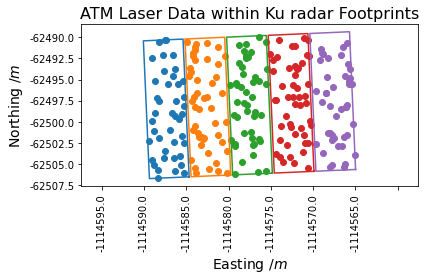

In [10]:
for coinc in coincidence_arr:
    for sub_arr in coinc:
        if 'IRKUB1B_20160419_04_004_deconv.nc' in sub_arr:
            #finding the atm laser data file that coincides with ku_file:
            h5_file = coinc[0]
            ku_files = coinc[1]
atm_laser_file_data = projectedLaser(h5_file, "ease")
x_atm_laser_file_data, y_atm_laser_file_data = atm_laser_file_data.east, atm_laser_file_data.north
single_file_kdtree = spatial.cKDTree(np.column_stack((x_atm_laser_file_data, y_atm_laser_file_data)))
x_ku,y_ku,alt_ku, pitch_ku, roll_ku, aircraft_alt_ku, azi_angle, appropriate_indices = correctEastNorthKu('IRKUB1B_20160419_04_004_deconv.nc', coord_sys="ease")
KDTreePlot(x_ku[755:760], y_ku[755:760], alt_ku[755:760], pitch_ku[755:760], roll_ku[755:760], aircraft_alt_ku[755:760], azi_angle[755:760], atm_coords=np.column_stack([x_atm_laser_file_data,y_atm_laser_file_data]),kdtree=single_file_kdtree )
plt.show()
x_ku,y_ku,alt_ku, pitch_ku, roll_ku, aircraft_alt_ku, azi_angle, appropriate_indices = correctEastNorthKu('IRKUB1B_20160419_04_004_deconv.nc', coord_sys="ease")
KDTreePlot(x_ku[755:760], y_ku[755:760], alt_ku[755:760], pitch_ku[755:760], roll_ku[755:760], aircraft_alt_ku[755:760], azi_angle[755:760], atm_coords=np.column_stack([x_atm_laser,y_atm_laser]),kdtree=overlapping_kdtree )

In [11]:
offset_list_2D = []
angle_thresh=3

for ku_file_counter, ku_file in enumerate(coincident_ku_files):
    offset_list_file = []
    x_ku,y_ku,alt_ku, pitch_ku, roll_ku, aircraft_alt_ku, azi_angle, appropriate_indices = correctEastNorthKu(ku_file, coord_sys="ease")
    ku_subpath = "ku/"
    try:
        nc = netCDF4.Dataset(ku_file) #making an nc file in the format that Python can understand
    except FileNotFoundError:
        try:
            nc = netCDF4.Dataset(ku_subpath+ku_file)
        except FileNotFoundError:
            nc = netCDF4.Dataset(ku_path+ku_file)
    log_amplitude = nc['amplitude'][appropriate_indices] #a 2-D array of stacked waveforms, with the first index being waveform number 
                                    #and the second being the range bin number of a particular waveform. 
                                  #Contains log-amplitude waveform data
                                    #Shape = [number of waveforms x number of range bins in each waveform]
    fasttime_ku = nc['fasttime'][:]
    j=-1
    for footprint, footprint_data in footprintDataYielder(x_ku, y_ku, alt_ku, pitch_ku, roll_ku, aircraft_alt_ku, azi_angle, atm_laser.coords, overlapping_kdtree):
        j+=1
        #the altitudes of the ATM data within a particular ku footprint:
        atm_alts_within = [atm_laser.alt[datum] for datum in footprint_data]
        #the rolls of the ATM data within a particular ku footprint:
        atm_rolls_within = [atm_laser.roll[datum] for datum in footprint_data]
        atm_pitches_within = [atm_laser.pitch[datum] for datum in footprint_data]
        if len(atm_alts_within)>0 and \
        abs(roll_ku[j]*180/np.pi)<angle_thresh and \
        abs(pitch_ku[j]*180/np.pi)<angle_thresh and \
        all(abs(atm_roll*180/np.pi)<angle_thresh for atm_roll in atm_rolls_within) and \
        all(abs(atm_pitch*180/np.pi)<angle_thresh for atm_pitch in atm_pitches_within):
            unlog_amp = 10**(np.array(log_amplitude[j])/10)
            try:
                offset_list_file.append(np.nanmean(atm_alts_within) - Waveform(unlog_amp,fasttime_ku,footprint_atm_alts =\
                                                                               atm_alts_within,aircraft_alt=aircraft_alt_ku[j]).estimated_air_snow_alt)
            except:
                print(Waveform(unlog_amp,fasttime_ku,footprint_atm_alts = atm_alts_within,aircraft_alt=aircraft_alt_ku[j]).estimated_air_snow_alt)
                offset_list_file.append(np.nanmean(atm_alts_within) - Waveform(unlog_amp,fasttime_ku,footprint_atm_alts = atm_alts_within,aircraft_alt=\
                                                                               aircraft_alt_ku[j]).estimated_air_snow_alt)
                raise
    offset_list_2D.append(offset_list_file)
    

[ 0.09616248  0.07145191  0.05828274  0.01450113 -0.04183004 -0.02992244
 -0.00074517 -0.03512533 -0.03456479]
[0.05746733 0.06804965 0.06556756 0.06409278 0.05090897 0.05719533
 0.05332833 0.05229018 0.06637376]
[483. 381. 451. 453. 477. 447. 496. 504. 410.]


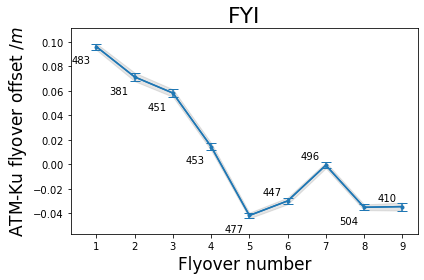

In [12]:
atm_ku_flyover_offset_means = np.full(len(offset_list_2D),np.nan, dtype='double')
atm_ku_flyover_offset_lens = np.full(len(offset_list_2D),np.nan, dtype= 'double')
atm_ku_flyover_offset_stds = np.full(len(offset_list_2D),np.nan, dtype='double')
atm_ku_flyover_offset_stes = np.full(len(offset_list_2D),np.nan, dtype='double')
for i, file_offsets in enumerate(offset_list_2D):
    atm_ku_flyover_offset_means[i] = np.nanmean(file_offsets)
    atm_ku_flyover_offset_stds[i] = np.nanstd(file_offsets, ddof=1)
    atm_ku_flyover_offset_stes[i] = np.nanstd(file_offsets, ddof=1)/np.sqrt(len(np.array(file_offsets)[~np.isnan(file_offsets)]))
    atm_ku_flyover_offset_lens[i] = len(np.array(file_offsets)[~np.isnan(file_offsets)])

print(atm_ku_flyover_offset_means)
print(atm_ku_flyover_offset_stds)
print(atm_ku_flyover_offset_lens)
errorPlot(range(1,len(atm_ku_flyover_offset_means)+1),atm_ku_flyover_offset_means, atm_ku_flyover_offset_stes, point_labels=atm_ku_flyover_offset_lens)
plt.xticks(range(1,len(atm_ku_flyover_offset_means)+1))
plt.ylabel("ATM-Ku flyover offset $/m$",fontsize=17)
plt.xlabel("Flyover number",fontsize=17)
plt.title(icetype.upper(), fontsize=22)
plt.tight_layout()
# plt.savefig("plots/ATMKuFlyoverOffsets.png", dpi=200)

#uncomment this line if you want a global offset instead of a file-by-file offset:
# atm_ku_flyover_offset_means[:] = np.nanmean(fflat(offset_list_2D))

In [13]:
print(atm_ku_flyover_offset_means)

[ 0.09616248  0.07145191  0.05828274  0.01450113 -0.04183004 -0.02992244
 -0.00074517 -0.03512533 -0.03456479]


In [14]:
angle_thresh=3
waveform_arr = []
y_linregresses = []
x_linregresses = []
across_track_linregresses = []

across_tr_effective_max_angles = np.array([], dtype='double')
lin_regress_angles = np.array([], dtype='double')
linreg_roll_angles = np.array([], dtype='double')

for ku_file_counter, ku_file in enumerate(coincident_ku_files):

    x_ku,y_ku,alt_ku, pitch_ku, roll_ku, aircraft_alt_ku, azi_angle, appropriate_indices = correctEastNorthKu(ku_file, coord_sys="ease")
    ku_subpath = "ku/"
    try:
        nc = netCDF4.Dataset(ku_file) #making an nc file in the format that Python can understand
    except FileNotFoundError:
        try:
            nc = netCDF4.Dataset(ku_subpath+ku_file)
        except FileNotFoundError:
            nc = netCDF4.Dataset(ku_path+ku_file)
    log_amplitude = nc['amplitude'][appropriate_indices] #a 2-D array of stacked waveforms, with the first index being waveform number 
                                    #and the second being the range bin number of a particular waveform. 
                                  #Contains log-amplitude waveform data
                                    #Shape = [number of waveforms x number of range bins in each waveform]
    fasttime_ku = nc['fasttime'][:]
    j=-1
    for footprint, footprint_data in footprintDataYielder(x_ku, y_ku, alt_ku, pitch_ku, roll_ku, aircraft_alt_ku, azi_angle, atm_laser.coords, overlapping_kdtree):
        j+=1
        #the altitudes of the ATM data within a particular ku footprint:
        atm_alts_within = [atm_laser.alt[datum] for datum in footprint_data]
        #the rolls of the ATM data within a particular ku footprint:
        atm_rolls_within = [atm_laser.roll[datum] for datum in footprint_data]
        atm_pitches_within = [atm_laser.pitch[datum] for datum in footprint_data]
        if len(atm_alts_within)>0 and \
        abs(roll_ku[j]*180/np.pi)<angle_thresh and \
        abs(pitch_ku[j]*180/np.pi)<angle_thresh and \
        all(abs(atm_roll*180/np.pi)<angle_thresh for atm_roll in atm_rolls_within) and \
        all(abs(atm_pitch*180/np.pi)<angle_thresh for atm_pitch in atm_pitches_within):
            
            indices_of_atm_points_within_10m_of_footprint_centre = overlapping_kdtree.query_ball_point([x_ku[j], y_ku[j]], r=10)
            indices_of_insitu_points_within_10m_of_footprint_centre = insitu_kdtree.query_ball_point([x_ku[j], y_ku[j]], r=10)

            """trying to find if multiple ATM laser points within a 10m radius circle have really closeby in situ data (within 10cm)"""    
            nearby_atm_and_insitu_within_10m_counter = 0
            atm_insitu_estimated_snowice_interface_alts = np.array([],dtype='double')
            atm_insitu_estimated_snowice_interface_xs = np.array([],dtype='double')
            atm_insitu_estimated_snowice_interface_ys = np.array([],dtype='double')
            atm_insitu_estimated_snowice_cross_track_projs = np.array([], dtype='double')
            #looping over the in situ and atm laser points that are within 10m of a particular ku SAR footprint centre::
            if len(indices_of_insitu_points_within_10m_of_footprint_centre)>0 and len(indices_of_atm_points_within_10m_of_footprint_centre)>0:
                for insitu_index in indices_of_insitu_points_within_10m_of_footprint_centre:
                    corresponding_atm_index_found = False
                    for atm_index in indices_of_atm_points_within_10m_of_footprint_centre:
                        #finding the in situ data within 10cm of the ATM laser spot:
                        if (insitu_xs[insitu_index] - x_atm_laser[atm_index])**2.0 + (insitu_ys[insitu_index] - y_atm_laser[atm_index])**2.0 < 0.25 \
                                                                                                        and not corresponding_atm_index_found:
                            nearby_atm_and_insitu_within_10m_counter+=1
                            #calculating the altitude of the sea ice interface by subtracking the in situ snowdepths 10cm close to atm laser data from the atm laser altitudes:
                            atm_insitu_estimated_snowice_interface_alts = np.append(atm_insitu_estimated_snowice_interface_alts, \
                                                                                    atm_laser.alt[atm_index] - DepthCm[insitu_index]/100)
                            corresponding_atm_index_found = True
                            atm_insitu_estimated_snowice_interface_xs = np.append(atm_insitu_estimated_snowice_interface_xs, insitu_xs[insitu_index])
                            atm_insitu_estimated_snowice_interface_ys = np.append(atm_insitu_estimated_snowice_interface_ys, insitu_ys[insitu_index])
                            #angle bet the centre of the footprint and the in situ data (clockwise from north): (atan2(y,x))
                            #(atan2(a,b) and does a/b so actually in this case
                            #xdiff will be the inputted as the first argument and ydiff will be the second, in order to calculate 
                            #angles clockwise from north:
                            theta_of_insitu = atan2(insitu_xs[insitu_index]-x_ku[j], insitu_ys[insitu_index]-y_ku[j])
                            insitu_dist_from_centre = np.sqrt((insitu_xs[insitu_index]-x_ku[j])**2.0 + (insitu_xs[insitu_index]-x_ku[j])**2.0)
                            atm_insitu_estimated_snowice_cross_track_projs = np.append(atm_insitu_estimated_snowice_cross_track_projs, \
                                                                                       insitu_dist_from_centre*np.sin(theta_of_insitu - azi_angle[j])) 
                            the_corresponding_atm_index = atm_index        
                            
            if nearby_atm_and_insitu_within_10m_counter>=2: #at this point in code, we know that there's enough data to calculate a s.d. of both sea ice and snow for the
                                                            #footprint, however, we dont know whether there is coincident ATM laser data within the Ku footprint 
                                                            #(which is what our method relies on, so we should make sure we have that next)
                                                            #oh wait actually we do becasue that was one of the criteria above where the pitch and roll is^^^^^^^^^^^^^^
                                                            #therefore, these footprints are viable for our calculations and comparisons 
                                                            #IF there's insitu snowdepths within the footprint:
                footprint_insitu_snowdepths = []
                for i in range(len(insitu_xs)):
                    if footprint.contains(Point(insitu_xs[i],insitu_ys[i])):
                        footprint_insitu_snowdepths.append(DepthCm[i]/100)
                if footprint_insitu_snowdepths:
                    atm_estimated_airsnow_interface_alts = []
                    for atm_index in indices_of_atm_points_within_10m_of_footprint_centre:
                        atm_estimated_airsnow_interface_alts.append(atm_laser.alt[atm_index])
                        
                    #calculating the standard deviations of the ATM-snowdepth derived sea ice interface altitudes::
                    snowice_std_within_10m = np.std(atm_insitu_estimated_snowice_interface_alts,ddof=1)
                    airsnow_std_within_10m = np.std(atm_estimated_airsnow_interface_alts, ddof=1)
                    #this is the power waveform:
                    unlog_amp = 10**(np.array(log_amplitude[j])/10)
                    waveform_peakiness = np.max(unlog_amp)/simps(unlog_amp)
                    
                    #estimating the slope in both the x-and y-directions:
                    y_linregresses.append(stats.linregress(atm_insitu_estimated_snowice_interface_ys, atm_insitu_estimated_snowice_interface_alts))
                    x_linregresses.append(stats.linregress(atm_insitu_estimated_snowice_interface_xs, atm_insitu_estimated_snowice_interface_alts))
                    across_track_linregress = linregress(atm_insitu_estimated_snowice_cross_track_projs,atm_insitu_estimated_snowice_interface_alts)
                    across_track_linregresses.append(across_track_linregress)
                    H = (aircraft_alt_ku[j] - alt_ku[j])
                    #pulse-limited across track dimension (pp. 12/17 of Ku SAR doc):
                    across_tr_dim = 2*np.sqrt(299792458*1.5*H/(3.5*10**9))
                    across_tr_effective_max_angles = np.append(across_tr_effective_max_angles,  atan(across_tr_dim/2/H))
                    lin_regress_angles = np.append(lin_regress_angles, atan(across_track_linregress.slope))
                    linreg_roll_angles = np.append(linreg_roll_angles, roll_ku[j])
                    
                    wavef = Waveform(unlog_amp, fasttime_ku, easting=x_ku[j],northing=y_ku[j],peakiness=waveform_peakiness,\
                                    actual_snow_ice_alt=np.nanmean(atm_insitu_estimated_snowice_interface_alts), \
                                    actual_air_snow_alt = np.nanmean(atm_estimated_airsnow_interface_alts), \
                                    snow_ice_std = snowice_std_within_10m, air_snow_std = airsnow_std_within_10m,\
                                     aircraft_alt=aircraft_alt_ku[j] + atm_ku_flyover_offset_means[ku_file_counter], footprint_polygon = footprint, \
                                     footprint_atm_alts = atm_alts_within, insitu_snowdepths = footprint_insitu_snowdepths)
                    waveform_arr.append(wavef)


In [15]:
#so that the arrays can be saved for the fyi and myi and combined together (if you rerun all cells above for the other ice type)::
exec(str(icetype)+"_waveform_arr = waveform_arr")

In [16]:
snow_ice_roughnesses = []
air_snow_roughnesses = []
retrackabilities = []
waveform_areas = []
waveform_peakinesses = []
waveform_types = []
atm_air_snow_alts = []
estimated_snow_ice_alts = []
actual_snow_ice_alts = []
actual_snowdepths = [] #snowdepths calculated by finding the insitu measurements of snowdepth within the footprint itself
estimated_snowdepths = [] # snowdepths estimated from subtracting the mean elevation of the atm laser data from the ku SAR
snowdepth_discrepancies = []

for waveform in np.append(waveform_arr, []): #you can always add the arry for the other type of ice in the empty slot here to combine them!
    if ~np.isnan(waveform.estimated_snowdepth - np.nanmean(waveform.insitu_snowdepths)):
        pass
#         print(waveform.estimated_snowdepth - waveform.actual_snowdepth)
    snow_ice_roughnesses.append(waveform.snow_ice_std)
    air_snow_roughnesses.append(waveform.air_snow_std)
    retrackabilities.append(waveform.extractable_snowdepth_boolean)
    waveform_areas.append(waveform.waveform_area)
    waveform_peakinesses.append(waveform.peakiness)
    waveform_types.append(waveform.waveform_type)
    atm_air_snow_alts.append(waveform.footprint_atm_alts)
    estimated_snow_ice_alts.append(waveform.estimated_snow_ice_alt)
    actual_snow_ice_alts.append(waveform.actual_snow_ice_alt)
    actual_snowdepths.append(np.nanmean(waveform.insitu_snowdepths))
    estimated_snowdepths.append(waveform.estimated_snowdepth)
    snowdepth_discrepancies.append(waveform.estimated_snowdepth - np.nanmean(waveform.insitu_snowdepths))

In [17]:

print(max(actual_snowdepths))
print(max(actual_snowdepths))
print(len(np.array(actual_snowdepths)[~np.isnan(actual_snowdepths)]))
print(np.count_nonzero(actual_snowdepths))
print(np.ma.count(actual_snowdepths))
print(np.count_nonzero(estimated_snowdepths))
print(np.nanmean(actual_snowdepths))
print(np.nanmean(estimated_snowdepths))

0.36858
0.36858
811
811
811
811
0.20502339188009275
0.1969114323443065


In [18]:
retrackabilities[:] = map(lambda x :int(x == True), retrackabilities) #converts Trues and Falses into 1s and 0s respectively

snow_ice_roughness_vals,snow_ice_retracks = nthTupleBoxPlotter(snow_ice_roughnesses, retrackabilities, 10, percentiles=True)
snow_ice_roughness_vals,snow_ice_snowdepth_errs = nthTupleBoxPlotter(np.array(snow_ice_roughnesses)[~np.isnan(snowdepth_discrepancies)], \
                                                                     np.array(snowdepth_discrepancies)[~np.isnan(snowdepth_discrepancies)], 10, percentiles=True)
air_snow_roughness_vals, air_snow_retracks = nthTupleBoxPlotter(air_snow_roughnesses, retrackabilities, 10, percentiles=True)
air_snow_roughness_vals, air_snow_snowdepth_errs = nthTupleBoxPlotter(np.array(air_snow_roughnesses)[~np.isnan(snowdepth_discrepancies)], \
                                                                      np.array(snowdepth_discrepancies)[~np.isnan(snowdepth_discrepancies)], 10, percentiles=True)
waveform_area_vals, area_retracks = nthTupleBoxPlotter(waveform_areas, retrackabilities, 10, percentiles=True)
waveform_area_vals, area_snowdepth_errs = nthTupleBoxPlotter(np.array(waveform_areas)[~np.isnan(snowdepth_discrepancies)], \
                                                             np.array(snowdepth_discrepancies)[~np.isnan(snowdepth_discrepancies)], 10, percentiles=True)
peaky_vals,peaky_retracks = nthTupleBoxPlotter(waveform_peakinesses, retrackabilities, 10, percentiles=True)
peaky_vals,peaky_snowdepth_errs = nthTupleBoxPlotter(np.array(waveform_peakinesses)[~np.isnan(snowdepth_discrepancies)],\
                                                     np.array(snowdepth_discrepancies)[~np.isnan(snowdepth_discrepancies)], 10, percentiles=True)


In [19]:
def errorPlot(x_vals,y_vals,y_errs,point_labels=False,x_errs =False, fill_between_errorbars = True, annotate=True, label=False, colour='#1f77b4'):
    if label:
        line, = plt.plot(x_vals,y_vals,color=colour, linestyle = '-', marker='.', label=label)
    else:
        line, = plt.plot(x_vals,y_vals,color=colour, linestyle = '-', marker = '.')
    plt.errorbar(x_vals,y_vals, yerr=y_errs, capthick=1,capsize=5, ecolor=colour, color=colour)
    if x_errs:
        pass
        plt.errorbar(x_vals,y_vals, xerr=x_errs, capthick=1,capsize=5, ecolor=colour, color=colour)
    #make sure that you've already filtered out all nan data that might contribute to the point_label number values
    if annotate and np.any(point_labels):
        for i, txt in enumerate(point_labels):
            if i==0:
                if y_vals[i+1]>y_vals[i]:
                    plt.annotate(str(int(txt)), (x_vals[i] - (np.nanmax(x_vals)-np.nanmin(x_vals))/50 - len(str(txt))*(np.nanmax(x_vals)-np.nanmin(x_vals))/80, \
                                       [np.nanmean(y_val) for y_val in y_vals][i]+(np.nanmax(y_vals)-np.nanmin(y_vals))/30))
                else:
                    plt.annotate(str(int(txt)), (x_vals[i] - (np.nanmax(x_vals)-np.nanmin(x_vals))/50 - len(str(txt))*(np.nanmax(x_vals)-np.nanmin(x_vals))/80, \
                                       [np.nanmean(y_val) for y_val in y_vals][i]-(np.nanmax(y_vals)-np.nanmin(y_vals))/10))
            elif y_vals[i]> y_vals[i-1]:
                plt.annotate(str(int(txt)), (x_vals[i] - (np.nanmax(x_vals)-np.nanmin(x_vals))/50 - len(str(txt))*(np.nanmax(x_vals)-np.nanmin(x_vals))/80, \
                                   [np.nanmean(y_val) for y_val in y_vals][i]+(np.nanmax(y_vals)-np.nanmin(y_vals))/30))
            else:
                plt.annotate(str(int(txt)), (x_vals[i] - (np.nanmax(x_vals)-np.nanmin(x_vals))/50 - len(str(txt))*(np.nanmax(x_vals)-np.nanmin(x_vals))/80, \
                                   [np.nanmean(y_val) for y_val in y_vals][i]-(np.nanmax(y_vals)-np.nanmin(y_vals))/10))
    plt.xlim(np.nanmin(x_vals)-(np.nanmax(x_vals)-np.nanmin(x_vals))/12,)
    plt.ylim(np.nanmin(y_vals)-np.nanmax(y_errs) - (np.nanmax(y_vals)-np.nanmin(y_vals))/12, \
             np.nanmax(y_vals)+np.nanmax(y_errs) + (np.nanmax(y_vals)-np.nanmin(y_vals))/12) 
    if fill_between_errorbars:
        plt.fill_between(x_vals, np.subtract(y_vals,y_errs, where=~np.isnan(np.array(y_vals)+np.array(y_errs))), \
                         np.add(y_vals,y_errs,where=~np.isnan(np.array(y_vals)+np.array(y_errs))), color='gray', alpha=0.2)

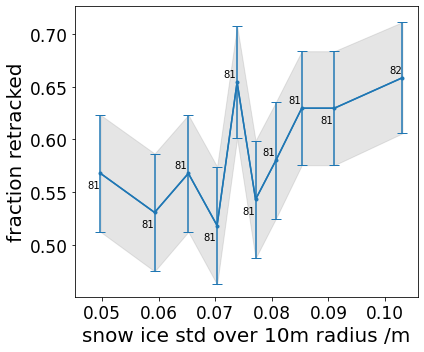

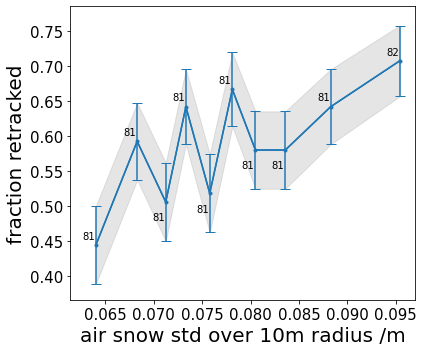

In [20]:
fig = plt.figure(figsize=(6,5))
y_vals = [np.mean(ret) for ret in snow_ice_retracks]
y_errs = [np.std(ret,ddof=1)/np.sqrt(len(ret)) for ret in snow_ice_retracks]
point_labels = [len(ret) for ret in snow_ice_retracks]
errorPlot(snow_ice_roughness_vals,y_vals,y_errs, point_labels)
plt.xlabel("snow ice std over 10m radius /m", fontsize=20)
plt.ylabel("fraction retracked", fontsize=20)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.tight_layout()
if saving:
    pass
    plt.savefig("../Thesis/graphics/"+str(icetype).upper()+"snowicefracret.png",dpi=200)
plt.show()


fig = plt.figure(figsize=(6,5))
y_vals = [np.mean(ret) for ret in air_snow_retracks]
y_errs = [np.std(ret,ddof=1)/np.sqrt(len(ret)) for ret in air_snow_retracks]
point_labels = [len(ret) for ret in air_snow_retracks]
errorPlot(air_snow_roughness_vals,y_vals,y_errs, point_labels)
plt.xlabel("air snow std over 10m radius /m", fontsize=20)
plt.ylabel("fraction retracked", fontsize=20);
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.tight_layout()
if saving:
    pass
    plt.savefig("../Thesis/graphics/"+str(icetype).upper()+"airsnowfracret.png",dpi=200)
plt.show()

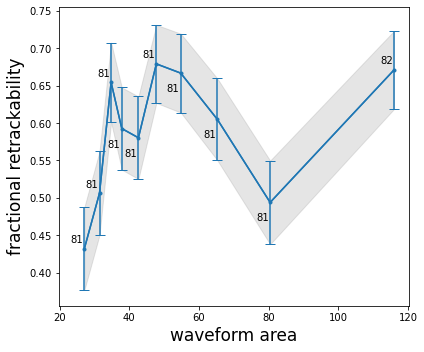

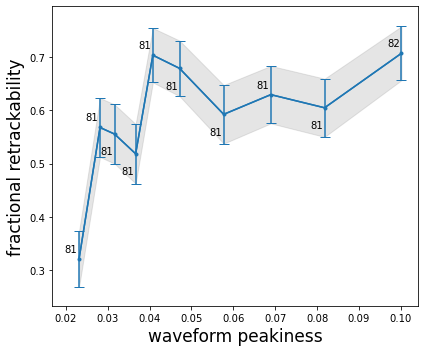

In [21]:
fig = plt.figure(figsize=(6,5))
y_vals = [np.mean(ret) for ret in area_retracks]
y_errs = [np.std(ret,ddof=1)/np.sqrt(len(ret)) for ret in area_retracks]
point_labels = [len(ret) for ret in area_retracks]
errorPlot(waveform_area_vals,y_vals,y_errs, point_labels)
plt.xlabel("waveform area", fontsize=17)
plt.ylabel("fractional retrackability", fontsize=17)
plt.tight_layout()
if saving:
    pass
    plt.savefig("plots/"+str(icetype).upper()+"/waveareafracret.png",dpi=200)
plt.show()

fig = plt.figure(figsize=(6,5))
y_vals = [np.mean(ret) for ret in peaky_retracks]
y_errs = [np.std(ret,ddof=1)/np.sqrt(len(ret)) for ret in peaky_retracks]
point_labels = [len(ret) for ret in peaky_retracks]
errorPlot(peaky_vals,y_vals,y_errs, point_labels)
plt.xlabel("waveform peakiness", fontsize=17)
plt.ylabel("fractional retrackability", fontsize=17)
plt.tight_layout()
if saving:
    pass
    plt.savefig("../Thesis/graphics/"+str(icetype).upper()+"peakinessfracret.png",dpi=200)
plt.show()

/Users/claudederijkethomas/Desktop/PhD/PYTHON/LPS/LPS_functions.py:63: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  absarr = lambda arr: np.array([abs(arr[j]) for j in range(len(arr))])


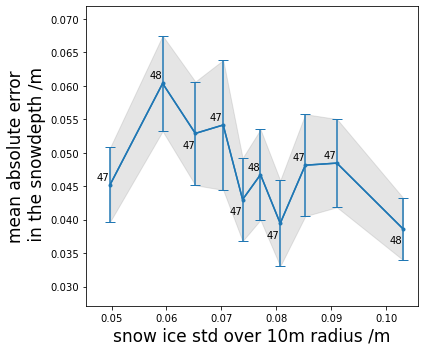

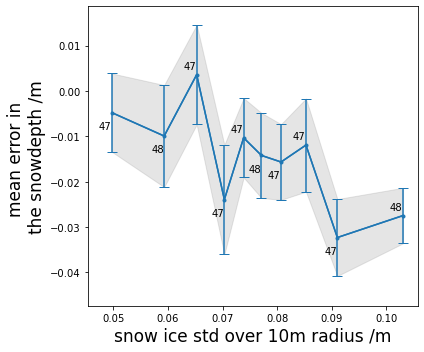

In [22]:
snow_ice_snowdepth_abs_errs = absarr(snow_ice_snowdepth_errs)
fig = plt.figure(figsize=(6,5))
y_vals = [np.nanmean(ret) for ret in snow_ice_snowdepth_abs_errs]
y_errs = [np.nanstd(ret,ddof=1)/np.sqrt(len(ret[~np.isnan(ret)])) for ret in snow_ice_snowdepth_abs_errs]
point_labels = [len(ret[~np.isnan(ret)]) for ret in snow_ice_snowdepth_abs_errs]
errorPlot(snow_ice_roughness_vals,y_vals,y_errs, point_labels)
plt.xlabel("snow ice std over 10m radius /m", fontsize=17)
plt.ylabel("mean absolute error\n in the snowdepth /m", fontsize=17)
plt.tight_layout()
if saving:
    pass
    plt.savefig("../Thesis/graphics/"+str(icetype).upper()+"snowicestdabserr.png",dpi=200)
plt.show()

fig = plt.figure(figsize=(6,5))
y_vals = [np.nanmean(ret) for ret in snow_ice_snowdepth_errs]
y_errs = [np.nanstd(ret,ddof=1)/np.sqrt(len(ret[~np.isnan(ret)])) for ret in snow_ice_snowdepth_errs]
point_labels = [len(ret[~np.isnan(ret)]) for ret in snow_ice_snowdepth_errs]
errorPlot(snow_ice_roughness_vals,y_vals,y_errs, point_labels)
plt.xlabel("snow ice std over 10m radius /m", fontsize=17)
plt.ylabel("mean error in \nthe snowdepth /m", fontsize=17)
plt.tight_layout()
if saving:
    pass
    # plt.savefig("plots/"+str(icetype).upper()+"/snowicestderr.png",dpi=200)
plt.show()

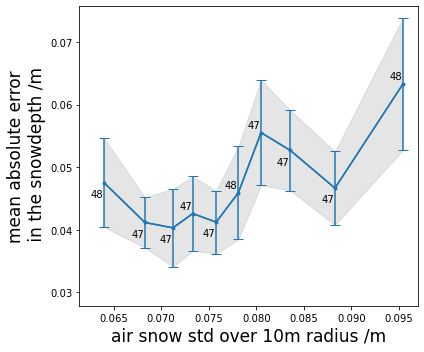

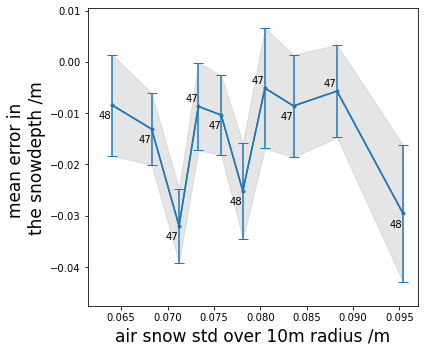

In [23]:
air_snow_snowdepth_abs_errs = absarr(air_snow_snowdepth_errs)
fig = plt.figure(figsize=(6,5))
y_vals = [np.nanmean(ret,dtype='float32') for ret in air_snow_snowdepth_abs_errs]
y_errs = [np.nanstd(ret,dtype='float32',ddof=1)/np.sqrt(len(ret[~np.isnan(ret)])) for ret in air_snow_snowdepth_abs_errs]
point_labels = [len(ret[~np.isnan(ret)]) for ret in air_snow_snowdepth_abs_errs]
errorPlot(air_snow_roughness_vals,y_vals,y_errs, point_labels)
plt.xlabel("air snow std over 10m radius /m", fontsize=17)
plt.ylabel("mean absolute error\n in the snowdepth /m", fontsize=17)
plt.tight_layout()
if saving:
    pass
    plt.savefig("../Thesis/graphics/"+str(icetype).upper()+"airsnowestdabserr.png",dpi=200)
plt.show()

fig = plt.figure(figsize=(6,5))
y_vals = [np.nanmean(ret) for ret in air_snow_snowdepth_errs]
y_errs = [np.nanstd(ret,ddof=1)/np.sqrt(len(ret[~np.isnan(ret)])) for ret in air_snow_snowdepth_errs]
errorPlot(air_snow_roughness_vals,y_vals,y_errs, point_labels)
plt.xlabel("air snow std over 10m radius /m", fontsize=17)
plt.ylabel("mean error in \nthe snowdepth /m", fontsize=17)
plt.tight_layout()
if saving:
    pass
    plt.savefig("plots/"+str(icetype).upper()+"/airsnowstderr.png",dpi=200)
plt.show()

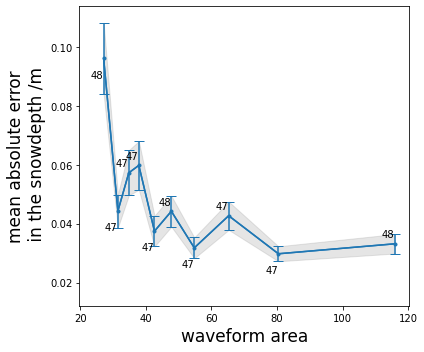

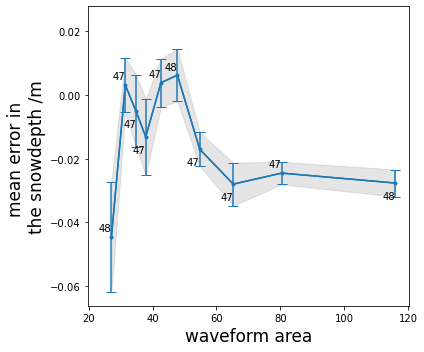

In [24]:
area_abs_snowdepth_errs = absarr(area_snowdepth_errs)

fig = plt.figure(figsize=(6,5))
y_vals = [np.nanmean(ret) for ret in area_abs_snowdepth_errs]
y_errs = [np.nanstd(ret,ddof=1)/np.sqrt(len(ret[~np.isnan(ret)])) for ret in area_abs_snowdepth_errs]
point_labels = [len(ret[~np.isnan(ret)]) for ret in area_abs_snowdepth_errs]
errorPlot(waveform_area_vals,y_vals,y_errs, point_labels)
plt.xlabel("waveform area", fontsize=17)
plt.ylabel("mean absolute error\n in the snowdepth /m", fontsize=17)
plt.tight_layout()
if saving:
    pass
    plt.savefig("plots/"+str(icetype).upper()+"/waveformareaabserr.png",dpi=200)
plt.show()

fig = plt.figure(figsize=(6,5))
y_vals = [np.nanmean(ret) for ret in area_snowdepth_errs]
y_errs = [np.nanstd(ret,ddof=1)/np.sqrt(len(ret[~np.isnan(ret)])) for ret in area_snowdepth_errs]
point_labels = [len(ret[~np.isnan(ret)]) for ret in area_snowdepth_errs]
errorPlot(waveform_area_vals,y_vals,y_errs, point_labels)
plt.xlabel("waveform area", fontsize=17)
plt.ylabel("mean error in \nthe snowdepth /m", fontsize=17)
plt.tight_layout()
if saving:
    pass
    plt.savefig("plots/"+str(icetype).upper()+"/waveformareaerr.png",dpi=200)
plt.show()

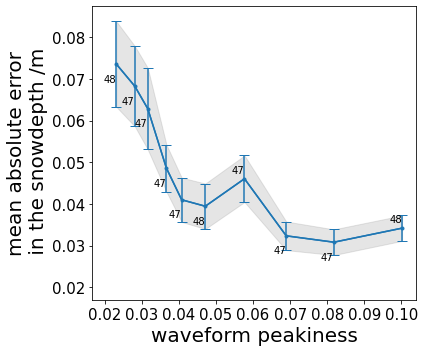

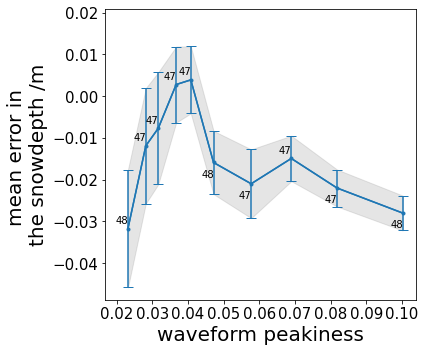

In [25]:
peaky_abs_snowdepth_errs = absarr(peaky_snowdepth_errs)

fig = plt.figure(figsize=(6,5))
y_vals = [np.nanmean(ret) for ret in peaky_abs_snowdepth_errs]
y_errs = [np.nanstd(ret,ddof=1)/np.sqrt(len(ret[~np.isnan(ret)])) for ret in peaky_abs_snowdepth_errs]
point_labels = [len(ret[~np.isnan(ret)]) for ret in peaky_abs_snowdepth_errs]
errorPlot(peaky_vals,y_vals,y_errs, point_labels)
plt.xlabel("waveform peakiness", fontsize=20)
plt.ylabel("mean absolute error\n in the snowdepth /m", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.tight_layout()
if saving:
    pass
    plt.savefig("../Thesis/graphics/"+str(icetype).upper()+"peakinessabserr.png",dpi=200)
plt.show()

fig = plt.figure(figsize=(6,5))
y_errs = [np.nanstd(ret,ddof=1)/np.sqrt(len(ret[~np.isnan(ret)])) for ret in peaky_snowdepth_errs]
point_labels = [len(ret[~np.isnan(ret)]) for ret in peaky_snowdepth_errs]
errorPlot(peaky_vals,[np.nanmean(ret) for ret in peaky_snowdepth_errs],y_errs,point_labels)
plt.xlabel("waveform peakiness", fontsize=20)
plt.ylabel("mean error in \nthe snowdepth /m", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.tight_layout()
if saving:
    pass
    plt.savefig("../Thesis/graphics/"+str(icetype).upper()+"peakinesserr.png",dpi=200)
plt.show()

In [26]:
angle_thresh=3
waveforms_with_insitu = []
unusable_count = 0
usable_count = 0
for ku_file_counter, ku_file in enumerate(coincident_ku_files):

    x_ku,y_ku,alt_ku, pitch_ku, roll_ku, aircraft_alt_ku, azi_angle, appropriate_indices = correctEastNorthKu(ku_file, coord_sys="ease")
    ku_subpath = "ku/"
    try:
        nc = netCDF4.Dataset(ku_file) #making an nc file in the format that Python can understand
    except FileNotFoundError:
        try:
            nc = netCDF4.Dataset(ku_subpath+ku_file)
        except FileNotFoundError:
            nc = netCDF4.Dataset(ku_path+ku_file)
    log_amplitude = nc['amplitude'][appropriate_indices] #a 2-D array of stacked waveforms, with the first index being waveform number 
                                    #and the second being the range bin number of a particular waveform. 
                                  #Contains log-amplitude waveform data
                                    #Shape = [number of waveforms x number of range bins in each waveform]
    fasttime_ku = nc['fasttime'][:]
    j=-1
    for footprint, footprint_data in footprintDataYielder(x_ku, y_ku, alt_ku, pitch_ku, roll_ku, aircraft_alt_ku, azi_angle, atm_laser.coords, overlapping_kdtree):
        j+=1
        #the altitudes of the ATM data within a particular ku footprint:
        atm_alts_within = [atm_laser.alt[datum] for datum in footprint_data]
        #the rolls of the ATM data within a particular ku footprint:
        atm_rolls_within = [atm_laser.roll[datum] for datum in footprint_data]
        atm_pitches_within = [atm_laser.pitch[datum] for datum in footprint_data]
        if len(atm_alts_within)>0 and \
        abs(roll_ku[j]*180/np.pi)<angle_thresh and \
        abs(pitch_ku[j]*180/np.pi)<angle_thresh and \
        all(abs(atm_roll*180/np.pi)<angle_thresh for atm_roll in atm_rolls_within) and \
        all(abs(atm_pitch*180/np.pi)<angle_thresh for atm_pitch in atm_pitches_within):
            
            indices_of_insitu_points_within_5m_of_footprint_centre = insitu_kdtree.query_ball_point([x_ku[j], y_ku[j]], r=5)
            
            footprint_insitu_snowdepths = []
            for i in indices_of_insitu_points_within_5m_of_footprint_centre:
                if footprint.contains(Point(insitu_xs[i],insitu_ys[i])):
                    footprint_insitu_snowdepths.append(DepthCm[i]/100)
            if footprint_insitu_snowdepths:
                unlog_amp = 10**(np.array(log_amplitude[j])/10)
                waveform_peakiness = np.max(unlog_amp)/simps(unlog_amp)

                wavef = Waveform(unlog_amp, fasttime_ku, easting=x_ku[j],northing=y_ku[j],peakiness=waveform_peakiness,\
                                 aircraft_alt=aircraft_alt_ku[j] + atm_ku_flyover_offset_means[ku_file_counter], footprint_polygon = footprint, \
                                 footprint_atm_alts = atm_alts_within, insitu_snowdepths = footprint_insitu_snowdepths)
                
                waveforms_with_insitu.append(wavef)

In [27]:
#so that the arrays can be saved for the fyi and myi and combined together (if you rerun all cells above for the other ice type)::
exec(str(icetype)+"_waveforms_with_insitu = waveforms_with_insitu")

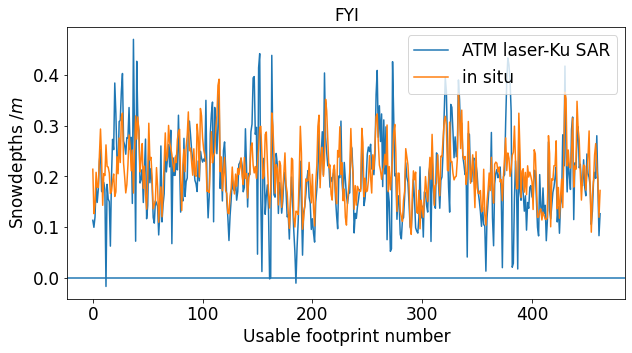

In [28]:
colocated_estimated_snowdepths = np.array([],dtype='double')
colocated_insitu_snowdepths = np.array([], dtype = 'double')
colocated_waveform_types = np.array([],dtype='str')
for waveform in np.append(waveforms_with_insitu,[]): #you can always add the array for the other type of ice here to combine them
    colocated_estimated_snowdepths = np.append(colocated_estimated_snowdepths, waveform.estimated_snowdepth)
    colocated_insitu_snowdepths = np.append(colocated_insitu_snowdepths, np.mean(waveform.insitu_snowdepths))                                      
    colocated_waveform_types = np.append(colocated_waveform_types, waveform.waveform_type)
plt.figure(figsize=(10,5))
plt.title(str(icetype).upper(), fontsize=17)
p_atmKu = plt.plot(colocated_estimated_snowdepths[~np.isnan(colocated_estimated_snowdepths-colocated_insitu_snowdepths)],c='#1f77b4',\
                   label = 'ATM laser-Ku SAR')
p_situ = plt.plot(colocated_insitu_snowdepths[~np.isnan(colocated_estimated_snowdepths-colocated_insitu_snowdepths)],c='#ff7f0e',\
                  label = 'in situ')
plt.legend(loc='best', prop={"size":17})
plt.xlabel("Usable footprint number", fontsize=17)
plt.ylabel("Snowdepths $/m$", fontsize=17)
plt.yticks(fontsize=17)
plt.xticks(fontsize=17)
plt.axhline(y=0)
if saving:
    pass
    plt.savefig("../Thesis/graphics/EstimatedAndActualSnowdepthsPlot"+str(icetype).upper()+"FlyOffset.png",dpi=200)

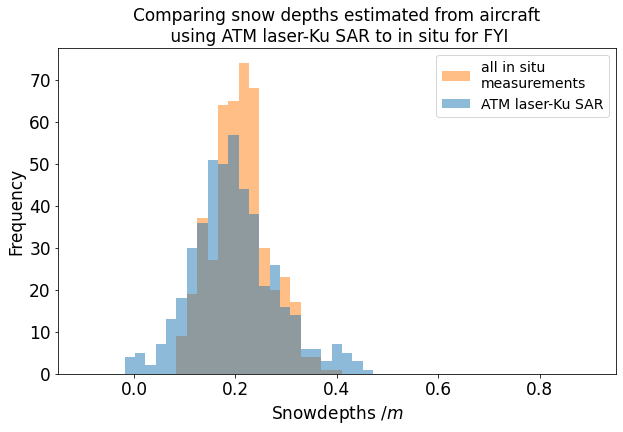

In [29]:
fig = plt.figure(figsize=(10,6))
plt.title("Comparing snow depths estimated from aircraft\n using ATM laser-Ku SAR to in situ for "+str(icetype).upper(), fontsize=17)
plt.xlabel("Snowdepths $/m$", fontsize=17); plt.ylabel("Frequency", fontsize=17);
plt.hist(colocated_insitu_snowdepths[~np.isnan(colocated_estimated_snowdepths-colocated_insitu_snowdepths)], bins = np.linspace(-0.1,0.9,50), alpha = 0.5, label = 'all in situ\nmeasurements', density=False, color='#ff7f0e')
plt.hist(colocated_estimated_snowdepths[~np.isnan(colocated_estimated_snowdepths-colocated_insitu_snowdepths)], bins = np.linspace(-0.1,0.9,50), alpha = 0.5, label = 'ATM laser-Ku SAR', density=False, color='#1f77b4')
plt.legend(loc='best', prop={"size":14})
plt.yticks(fontsize=17)
plt.xticks(fontsize=17)
if saving:
    pass
    plt.savefig("../Thesis/graphics/EstimatedAndActualSnowdepthsHist"+str(icetype).upper()+"FlyOffset.png", dpi=200)
plt.show()

In [30]:
stats.ks_2samp(colocated_insitu_snowdepths[~np.isnan(colocated_estimated_snowdepths-colocated_insitu_snowdepths)], colocated_estimated_snowdepths[~np.isnan(colocated_estimated_snowdepths-colocated_insitu_snowdepths)], alternative='two-sided', mode='auto')

KstestResult(statistic=0.16630669546436286, pvalue=5.24546245077185e-06)

0.20067833698030638


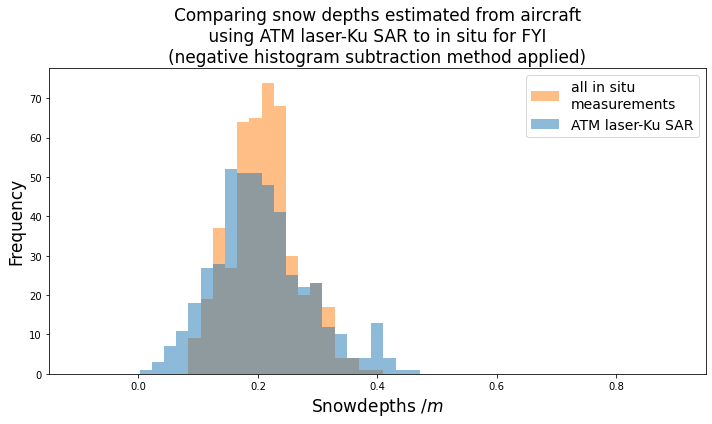

In [31]:
"""the negative hist subtraction method"""
fig = plt.figure(figsize=(10,6))

atmKu_hist_bins, atmKu_bin_edges = np.histogram(colocated_estimated_snowdepths[~np.isnan(colocated_estimated_snowdepths-colocated_insitu_snowdepths)], bins=np.linspace(-1, 2.5, 176))
atmKu_subtraction = list(reversed(atmKu_hist_bins[:50]))
atmKu_subtraction = np.append(atmKu_subtraction, np.zeros(75))
atmKu_residual_bins = atmKu_hist_bins[50:] - atmKu_subtraction #the residual histogram bin heights that remain when subtracting negative side from positive side

new_res_arr_atmKu = [] #the residual array of processed snowdepths 
for i in range(len(atmKu_residual_bins)):
    res_bin_height = int(atmKu_residual_bins[i])
    for j in range(res_bin_height):
        new_res_arr_atmKu.append(np.linspace(0.01, 2.49, 125)[i])
plt.hist(colocated_insitu_snowdepths[~np.isnan(colocated_estimated_snowdepths-colocated_insitu_snowdepths)], bins = np.linspace(-0.1,0.9,50), alpha = 0.5, label = 'all in situ\nmeasurements', density=False, color='#ff7f0e')
plt.hist(new_res_arr_atmKu, bins = np.linspace(-0.1,0.9,50), label = 'ATM laser-Ku SAR',alpha=0.5,color='#1f77b4')

plt.xlabel("Snowdepths $/m$", fontsize=17); plt.ylabel("Frequency", fontsize=17);
plt.title("Comparing snow depths estimated from aircraft\n using ATM laser-Ku SAR to in situ for FYI \n(negative histogram subtraction method applied)", fontsize=17)

plt.legend(loc='best', prop={"size":14})
plt.tight_layout()
if saving:
    pass
    plt.savefig("../Thesis/graphics/EstimatedAndActualSnowdepthsHistSubtractedMYIFlyOffset.png", dpi=200)
print(np.mean(new_res_arr_atmKu))

In [32]:
stats.ks_2samp(colocated_insitu_snowdepths[~np.isnan(colocated_estimated_snowdepths-colocated_insitu_snowdepths)],new_res_arr_atmKu , alternative='two-sided', mode='auto')

KstestResult(statistic=0.20215888199403567, pvalue=1.0105211437305953e-08)

In [33]:
print(np.mean(colocated_estimated_snowdepths[~np.isnan(colocated_estimated_snowdepths-colocated_insitu_snowdepths)][colocated_estimated_snowdepths[~np.isnan(colocated_estimated_snowdepths-colocated_insitu_snowdepths)]<1.2]))
print(np.std(colocated_estimated_snowdepths[~np.isnan(colocated_estimated_snowdepths-colocated_insitu_snowdepths)][colocated_estimated_snowdepths[~np.isnan(colocated_estimated_snowdepths-colocated_insitu_snowdepths)]<1.2], ddof=1))
print(len(colocated_estimated_snowdepths[~np.isnan(colocated_estimated_snowdepths-colocated_insitu_snowdepths)]))
print(np.std(colocated_estimated_snowdepths[~np.isnan(colocated_estimated_snowdepths-colocated_insitu_snowdepths)][colocated_estimated_snowdepths[~np.isnan(colocated_estimated_snowdepths-colocated_insitu_snowdepths)]<1.2], ddof=1)/\
      np.sqrt(len(colocated_estimated_snowdepths[~np.isnan(colocated_estimated_snowdepths-colocated_insitu_snowdepths)][colocated_estimated_snowdepths[~np.isnan(colocated_estimated_snowdepths-colocated_insitu_snowdepths)]<1.2])))

print(np.mean(colocated_insitu_snowdepths[~np.isnan(colocated_estimated_snowdepths-colocated_insitu_snowdepths)]))
print(np.std(colocated_insitu_snowdepths[~np.isnan(colocated_estimated_snowdepths-colocated_insitu_snowdepths)], ddof=1))
print(len(colocated_insitu_snowdepths[~np.isnan(colocated_estimated_snowdepths-colocated_insitu_snowdepths)]))
print(np.std(colocated_insitu_snowdepths[~np.isnan(colocated_estimated_snowdepths-colocated_insitu_snowdepths)], ddof=1)/\
      np.sqrt(len(colocated_insitu_snowdepths[~np.isnan(colocated_estimated_snowdepths-colocated_insitu_snowdepths)])))
print(len(new_res_arr_atmKu))
print(np.mean(new_res_arr_atmKu))
print(np.std(new_res_arr_atmKu, ddof =1))
print(np.std(new_res_arr_atmKu, ddof =1)/np.sqrt(len(new_res_arr_atmKu)))

0.19798494399792635
0.08344610496408975
463
0.003878069378308747
0.21037286075383932
0.05645869155759136
463
0.00262385791359701
457
0.20067833698030638
0.08115246798703166
0.003796152336382212
